In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [250]:
def thin(A,delay,a_A,b_A,a_delay,b_delay,thin_factor,burn):
    size=np.shape(A)
    arr = np.arange(burn,size[0],thin_factor)
    a_A = np.ndarray.flatten(a_A_[arr])
    b_A = np.ndarray.flatten(b_A_[arr])
    a_delay = np.ndarray.flatten(a_delay_[arr])
    b_delay = np.ndarray.flatten(b_delay_[arr])
    A = A_[arr,:]
    delay = delay_[arr,:]
    return a_A,b_A,a_delay,b_delay,A,delay 
    
def gen_val_fixed(a_A,b_A,a_delay,b_delay,M):  
    size=np.shape(A)
    N=size[1]
    L=size[0]
    #A
    a1=a_A[np.random.randint(L,size=M)]
    b1=b_A[np.random.randint(L,size=M)]
    hier_A=np.random.gamma(a1,np.divide(1,b1))
    #delay
    a3=a_delay[np.random.randint(L,size=M)]
    b3=b_delay[np.random.randint(L,size=M)]
    hier_delay=np.random.gamma(a3,np.divide(1,b3))
    return hier_A, hier_delay

def plot_hyperparameters():
    f,axes = plt.subplots(2,4,figsize=(10,3))
    sns.kdeplot(a_A,shade=True,ax=axes[0,0])
    sns.kdeplot(b_A,shade=True,ax=axes[0,1])
    sns.kdeplot(a_delay,shade=True,ax=axes[0,2])
    sns.kdeplot(b_delay,shade=True,ax=axes[0,3])
    axes[1,0].plot(a_A,color='k',linewidth=0.5)
    axes[1,1].plot(b_A,color='k',linewidth=0.5)
    axes[1,2].plot(a_delay,color='k',linewidth=0.5)
    axes[1,3].plot(b_delay,color='k',linewidth=0.5)
    xlabels=[r'$a_A$',r'$b_A$',r'$a_\tau$',r'$b_\tau$']
    xlims = [max(a_A),max(b_A),max(a_delay),max(b_delay)]
    for j in range(4):
        for i in range(2):
            axes[i,j].spines['right'].set_color('none')
            axes[i,j].spines['top'].set_color('none')
            axes[i,j].tick_params(axis = 'both', which = 'major', labelsize = 10)
        axes[0,j].set_xlabel(xlabels[j],fontsize=10) 
        axes[1,j].set_ylabel(xlabels[j],fontsize=10) 
        axes[0,j].set_xticks(axes[0,j].get_xticks()[::1])
        axes[0,j].set_yticks(axes[0,j].get_yticks()[::1])
    axes[0,0].set_ylabel('PDF',fontsize=10)   
    plt.tight_layout(w_pad=2,h_pad=1)
    plt.suptitle('Hyperparameter Posterior Distributions',y=1.1)
    plt.show()
    data = [[r'$a_A$', np.mean(a_A), np.var(a_A)],
    [r'$b_A$', np.mean(b_A), np.var(b_A)],
    [r'$a_\tau$', np.mean(a_delay), np.var(a_delay)],
    [r'$b_\tau$', np.mean(b_delay), np.var(b_delay)]]
    headers=['Hyperparameter', 'Mean', 'Variance']
    print(pd.DataFrame(data,[1,2,3,4],headers))
    
    
    hier_A, hier_delay = gen_val_fixed(a_A,b_A,a_delay,b_delay,100000)
    f,axes = plt.subplots(1,2,figsize=(7,1.5))
    sns.kdeplot(hier_A,shade=True,ax=axes[0],color='C1')
    sns.kdeplot(hier_delay,shade=True,ax=axes[1],color='C1')
    xlabels=[r'$A$',r'$\tau$']
    xlims=[max(hier_A),max(hier_delay)]
    for i in range(2):
        axes[i].spines['right'].set_color('none')
        axes[i].spines['top'].set_color('none')
        axes[i].tick_params(axis = 'both', which = 'major', labelsize = 10)
        axes[i].set_xlabel(xlabels[i],fontsize=10) 
        axes[i].set_xlim([0,xlims[i]])
        axes[i].set_xticks(axes[i].get_xticks()[::2])
        axes[i].set_yticks(axes[i].get_yticks()[::2])
    axes[0].set_ylabel('PDF',fontsize=10)   
    plt.tight_layout()
    plt.suptitle('Population Posterior Distributions',y=1.1)
    plt.show()
    headers=['Parameter','Mean','Variance']
    data=[[r'$A$',np.mean(hier_A),np.var(hier_A)],[r'$\tau$',np.mean(hier_delay),np.var(hier_delay)]]
    print(pd.DataFrame(data,[1,2],headers))  
    
def display_invidual_estimates():
    plt.figure(figsize=(2,2))
    plt.scatter(np.mean(A,0),np.mean(delay,0),s=20,color='C0')
    plt.gca().tick_params(axis = 'both', which = 'major', labelsize = 10)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xlabel(r'$\hat{A}_n$',fontsize=10)
    plt.ylabel(r'$\hat{\tau}_n$',fontsize=10)
    plt.title('Individual parameter estimates',y=1.05)
    plt.hlines(np.mean(np.mean(delay,0)),0,max(np.mean(A,0)),color='k',alpha=0.5,linewidth=1)
    plt.vlines(np.mean(np.mean(A,0)),0,max(np.mean(delay,0)),color='k',alpha=0.5,linewidth=1)
    plt.show()
    
    headers=[r'$A$ estimate',r'$\tau$ estimate']
    data=np.transpose([np.mean(A,0),np.mean(delay,0)])
    print(pd.DataFrame(data,np.arange(1,np.shape(A)[1]+1),headers))
    


In [52]:
A_ = pd.read_csv("A.csv").values
delay_ = pd.read_csv("delay.csv").values
a_A_ = pd.read_csv("a_A.csv").values
a_delay_ = pd.read_csv("a_delay.csv").values
b_A_ = pd.read_csv("b_A.csv").values
b_delay_ = pd.read_csv("b_delay.csv").values

thin_factor=5
burn = 1000
a_A,b_A,a_delay,b_delay,A,delay = thin(A_,delay_,a_A_,b_A_,a_delay_,b_delay_,thin_factor,burn)

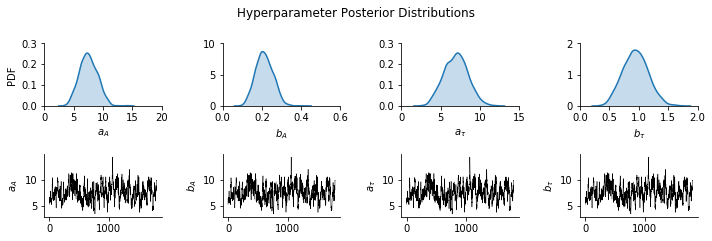

  Hyperparameter      Mean  Variance
1          $a_A$  7.569363  2.284557
2          $b_A$  0.213085  0.001939
3       $a_\tau$  6.971949  2.271382
4       $b_\tau$  6.971949  0.045412


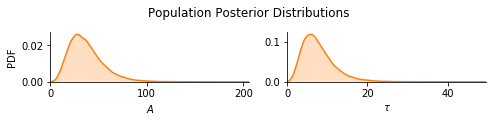

  Parameter       Mean    Variance
1       $A$  37.121587  316.820549
2    $\tau$   7.784427   16.284994


In [251]:
plot_hyperparameters()

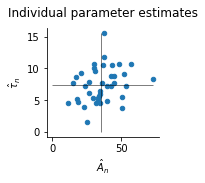

    $A$ estimate  $\tau$ estimate
1      57.590722        10.650111
2      34.677167         4.533950
3      18.410444         5.234967
4      50.465111         5.463706
5      35.935222         7.744500
6      73.566389         8.258111
7      11.860789         4.582567
8      31.422778         9.578744
9      48.862444        10.599056
10     29.561111         5.390833
11     34.771111         5.884944
12     32.000278         4.590511
13     50.634278         3.766039
14     25.562722         1.506411
15     37.140278        10.501556
16     39.756000         7.193794
17     43.497611        10.584667
18     17.167278         8.703944
19     33.405556         5.259889
20     37.672333        11.808111
21     42.760222         7.192100
22     18.806444         4.636294
23     45.082056         8.773150
24     15.491333         7.739900
25     30.713944        10.601056
26     33.673833         5.082383
27     37.756167        15.539667
28     40.007667         4.805494
29     34.5909

In [252]:
display_invidual_estimates()